# <mark>Attention!</mark>

This project was originally made in the Russian language. It takes quite a lot of effort to manually translate everything into English. So in order to understand what is going on here, **please use an automatic Google page translator**. It does a pretty decent job!

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общая-информация-о-данных" data-toc-modified-id="Общая-информация-о-данных-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Общая информация о данных</a></span></li><li><span><a href="#Гистограммы-распределения-значений-в-данных" data-toc-modified-id="Гистограммы-распределения-значений-в-данных-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Гистограммы распределения значений в данных</a></span></li><li><span><a href="#Кол-во-пропущенных-значений-в-данных" data-toc-modified-id="Кол-во-пропущенных-значений-в-данных-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Кол-во пропущенных значений в данных</a></span></li><li><span><a href="#Проверяем-максимальные-значения-в-колонках,-у-которых-чисельный-тип-данных." data-toc-modified-id="Проверяем-максимальные-значения-в-колонках,-у-которых-чисельный-тип-данных.-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>Проверяем максимальные значения в колонках, у которых чисельный тип данных.</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Работаем-с-колонкой-is_apartment" data-toc-modified-id="Работаем-с-колонкой-is_apartment-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Работаем с колонкой <code>is_apartment</code></a></span></li><li><span><a href="#Обработаем-колонку-floors_total" data-toc-modified-id="Обработаем-колонку-floors_total-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Обработаем колонку <code>floors_total</code></a></span></li><li><span><a href="#Приведём-тип-колонки-first_day_exposition-к-datetime" data-toc-modified-id="Приведём-тип-колонки-first_day_exposition-к-datetime-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Приведём тип колонки <code>first_day_exposition</code> к datetime</a></span></li><li><span><a href="#Посмотрим-колонку-floors_total" data-toc-modified-id="Посмотрим-колонку-floors_total-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>Посмотрим колонку <code>floors_total</code></a></span></li><li><span><a href="#Посмотрим-колонку-ceiling_height" data-toc-modified-id="Посмотрим-колонку-ceiling_height-2.0.5"><span class="toc-item-num">2.0.5&nbsp;&nbsp;</span>Посмотрим колонку <code>ceiling_height</code></a></span></li><li><span><a href="#Обработаем-колонку-balcony" data-toc-modified-id="Обработаем-колонку-balcony-2.0.6"><span class="toc-item-num">2.0.6&nbsp;&nbsp;</span>Обработаем колонку <code>balcony</code></a></span></li><li><span><a href="#Обработаем-колонку-locality_name" data-toc-modified-id="Обработаем-колонку-locality_name-2.0.7"><span class="toc-item-num">2.0.7&nbsp;&nbsp;</span>Обработаем колонку <code>locality_name</code></a></span></li><li><span><a href="#Обработаем-колонку-kitchen_area-и-living_area" data-toc-modified-id="Обработаем-колонку-kitchen_area-и-living_area-2.0.8"><span class="toc-item-num">2.0.8&nbsp;&nbsp;</span>Обработаем колонку <code>kitchen_area</code> и <code>living_area</code></a></span></li><li><span><a href="#Обработка-остальных-незаполненных-данных" data-toc-modified-id="Обработка-остальных-незаполненных-данных-2.0.9"><span class="toc-item-num">2.0.9&nbsp;&nbsp;</span>Обработка остальных незаполненных данных</a></span></li></ul></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Добавим-цену-квадратного-метра-в-таблицу" data-toc-modified-id="Добавим-цену-квадратного-метра-в-таблицу-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Добавим цену квадратного метра в таблицу</a></span></li><li><span><a href="#Добавим-день-недели,-месяц-и-год-публикации-объявления" data-toc-modified-id="Добавим-день-недели,-месяц-и-год-публикации-объявления-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Добавим день недели, месяц и год публикации объявления</a></span></li><li><span><a href="#Этаж-квартиры;-варианты-—-первый,-последний,-другой;" data-toc-modified-id="Этаж-квартиры;-варианты-—-первый,-последний,-другой;-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Этаж квартиры; варианты — первый, последний, другой;</a></span></li><li><span><a href="#Соотношение-жилой-и-общей-площади,-а-также-отношение-площади-кухни-к-общей." data-toc-modified-id="Соотношение-жилой-и-общей-площади,-а-также-отношение-площади-кухни-к-общей.-3.0.4"><span class="toc-item-num">3.0.4&nbsp;&nbsp;</span>Соотношение жилой и общей площади, а также отношение площади кухни к общей.</a></span></li></ul></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучаем-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков." data-toc-modified-id="Изучаем-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучаем следующие параметры: площадь, цена, число комнат, высота потолков.</a></span><ul class="toc-item"><li><span><a href="#Изучим-распределение-высоты-потолков" data-toc-modified-id="Изучим-распределение-высоты-потолков-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Изучим распределение высоты потолков</a></span></li></ul></li><li><span><a href="#Изучаем-время-продажи-квартиры." data-toc-modified-id="Изучаем-время-продажи-квартиры.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучаем время продажи квартиры.</a></span></li><li><span><a href="#Убераем-редкие-и-выбивающиеся-значения." data-toc-modified-id="Убераем-редкие-и-выбивающиеся-значения.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Убераем редкие и выбивающиеся значения.</a></span></li><li><span><a href="#Изучаем,-какие-факторы-больше-всего-влияют-на-стоимость-квартиры." data-toc-modified-id="Изучаем,-какие-факторы-больше-всего-влияют-на-стоимость-квартиры.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Изучаем, какие факторы больше всего влияют на стоимость квартиры.</a></span></li><li><span><a href="#Изучаем-зависимость-цены-от-того,-на-каком-этаже-расположена-квартира:-первом,-последнем-или-другом." data-toc-modified-id="Изучаем-зависимость-цены-от-того,-на-каком-этаже-расположена-квартира:-первом,-последнем-или-другом.-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Изучаем зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.</a></span></li><li><span><a href="#Изучаем-зависимость-от-даты-размещения:-дня-недели,-месяца-и-года." data-toc-modified-id="Изучаем-зависимость-от-даты-размещения:-дня-недели,-месяца-и-года.-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Изучаем зависимость от даты размещения: дня недели, месяца и года.</a></span></li><li><span><a href="#Выбераем-10-населённых-пунктов-с-наибольшим-числом-объявлений.-Считаем-среднюю-цену-квадратного-метра-в-этих-населённых-пунктах." data-toc-modified-id="Выбераем-10-населённых-пунктов-с-наибольшим-числом-объявлений.-Считаем-среднюю-цену-квадратного-метра-в-этих-населённых-пунктах.-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Выбераем 10 населённых пунктов с наибольшим числом объявлений. Считаем среднюю цену квадратного метра в этих населённых пунктах.</a></span></li><li><span><a href="#Выделяем-населённые-пункты-с-самой-высокой-и-низкой-стоимостью-жилья." data-toc-modified-id="Выделяем-населённые-пункты-с-самой-высокой-и-низкой-стоимостью-жилья.-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Выделяем населённые пункты с самой высокой и низкой стоимостью жилья.</a></span></li><li><span><a href="#Изучаем-предложения-квартир.-Выясняем,-какая-область-входит-в-центр." data-toc-modified-id="Изучаем-предложения-квартир.-Выясняем,-какая-область-входит-в-центр.-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Изучаем предложения квартир. Выясняем, какая область входит в центр.</a></span></li><li><span><a href="#Выделяем-сегмент-квартир-в-центре.-Анализируем-эту-территорию-и-изучаем-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков." data-toc-modified-id="Выделяем-сегмент-квартир-в-центре.-Анализируем-эту-территорию-и-изучаем-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков.-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>Выделяем сегмент квартир в центре. Анализируем эту территорию и изучаем следующие параметры: площадь, цена, число комнат, высота потолков.</a></span></li><li><span><a href="#Выделим-факторы,-которые-влияют-на-стоимость-квартиры-(число-комнат,-этаж,-удалённость-от-центра,-дата-размещения-объявления)." data-toc-modified-id="Выделим-факторы,-которые-влияют-на-стоимость-квартиры-(число-комнат,-этаж,-удалённость-от-центра,-дата-размещения-объявления).-4.11"><span class="toc-item-num">4.11&nbsp;&nbsp;</span>Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файла

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.__version__

'1.3.4'

In [6]:
try:
    estate_df = pd.read_csv('datasets/real_estate_data.csv', delimiter='\t')
except:
    estate_df = pd.read_csv('/datasets/real_estate_data.csv', delimiter='\t')
    
estate_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### Общая информация о данных

In [7]:
estate_df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [8]:
estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Гистограммы распределения значений в данных

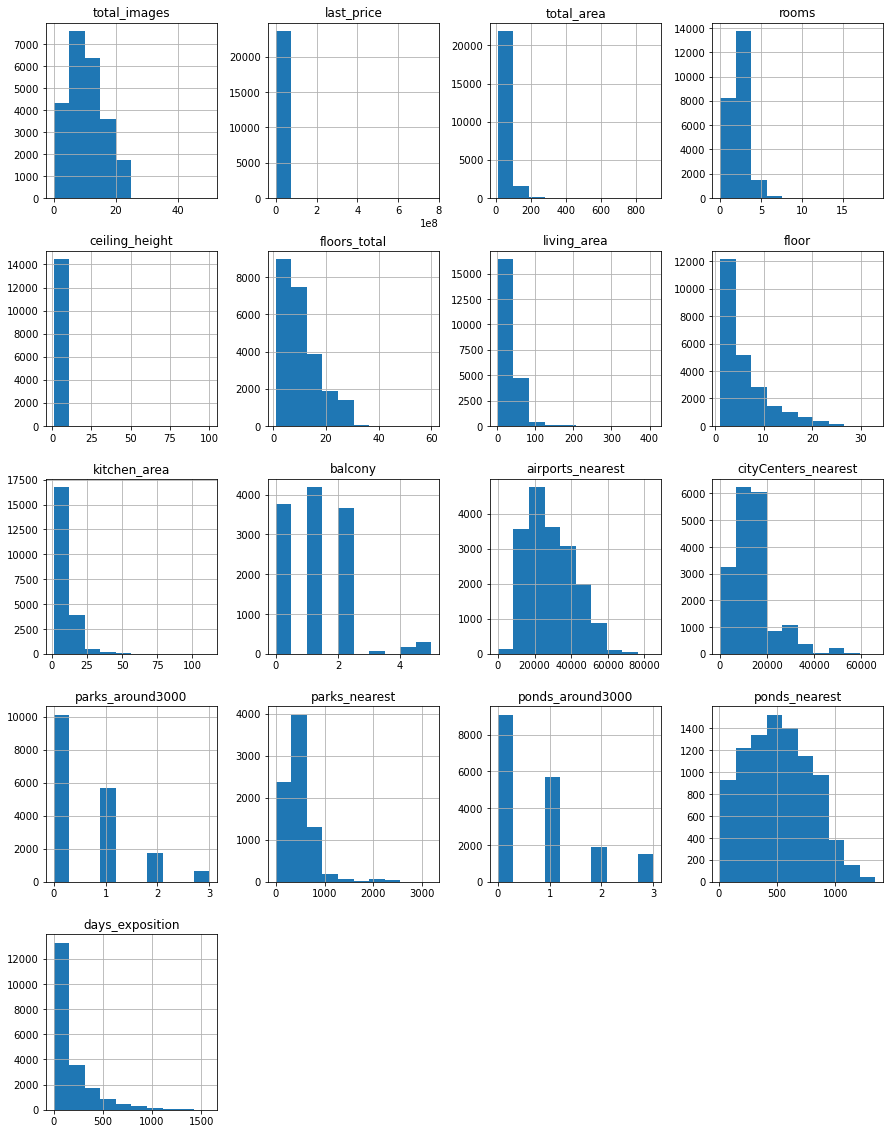

In [9]:
estate_df.hist(figsize=(15, 20))
plt.show()

#### Кол-во пропущенных значений в данных

In [10]:
estate_df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Проверяем максимальные значения в колонках, у которых чисельный тип данных.

In [11]:
for column in estate_df.select_dtypes(include='number'):
    print(f'Колонка {column}, макс. значение: {estate_df[column].max()}')

Колонка total_images, макс. значение: 50
Колонка last_price, макс. значение: 763000000.0
Колонка total_area, макс. значение: 900.0
Колонка rooms, макс. значение: 19
Колонка ceiling_height, макс. значение: 100.0
Колонка floors_total, макс. значение: 60.0
Колонка living_area, макс. значение: 409.7
Колонка floor, макс. значение: 33
Колонка kitchen_area, макс. значение: 112.0
Колонка balcony, макс. значение: 5.0
Колонка airports_nearest, макс. значение: 84869.0
Колонка cityCenters_nearest, макс. значение: 65968.0
Колонка parks_around3000, макс. значение: 3.0
Колонка parks_nearest, макс. значение: 3190.0
Колонка ponds_around3000, макс. значение: 3.0
Колонка ponds_nearest, макс. значение: 1344.0
Колонка days_exposition, макс. значение: 1580.0


### Вывод

Что видно на первый взгляд:
- много колонок, но их имена составлены корректно
- тип данных у большинства колонок кажется слишком завышеным по кол-ву битов (`int64` и `float64`) - это занимает много памяти
- колонку `first_day_exposition` нужно привести к типу `datetime`
- большинство цен на жильё указаны в районе 23 тыс. рублей - что явно некорректно
- в колонке `ceiling_height` есть выбросы
- в датасете много пропущенных значений
- в колонке `is_apartment` есть значение `nan` которое нужно заменить и желательно привести тип данных к булевому

## Предобработка данных

 В числовых колонках округлим значения до одного знака после запятой для удобства

In [12]:
for col in estate_df.select_dtypes(include='float64'):
    estate_df[col] = estate_df[col].round()

#### Работаем с колонкой `is_apartment`

In [13]:
print(f'Кол-во пропущенных значений в колонке "is_apartment" составляет {round(estate_df.is_apartment.isna().sum()/estate_df.shape[0]*100, 2)}%')

Кол-во пропущенных значений в колонке "is_apartment" составляет 88.29%


Взглянем на эти значения

In [14]:
estate_df[estate_df.is_apartment.isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,3.0,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.0,2018-12-04T00:00:00,1,NaN,11.0,19.0,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.0,4,NaN,...,8.0,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Пропусков слишком много - оставим всё как есть.

#### Обработаем колонку `floors_total`

Посчитаем, сколько есть домов по кол-ву этажей. Видно, что часть домов - уникальные. В дальнейшем, когда мы будем заниматься обработкой - эти данные могут подпортить нам жизнь, так как они единичны и не репрезентативны. Удалим их.

In [15]:
estate_df.floors_total.value_counts().to_frame().tail(7)

,floors_total
36.0,3
34.0,1
60.0,1
29.0,1
33.0,1
52.0,1
37.0,1


In [16]:
# получаем индексы (кол-во этажей) элементов, которые нам нужно убрать
drop = estate_df.floors_total.value_counts().to_frame().tail(7).index
drop

Float64Index([36.0, 34.0, 60.0, 29.0, 33.0, 52.0, 37.0], dtype='float64')

In [17]:
# убираем соответствующие индексы
estate_df = estate_df[~estate_df.floors_total.isin(drop)]

Считаем кол-во пропущенных значений в колонке `floors_total`. Их 86 (мало), в дальнейшем эти данные будут мешать при расчёте других параметров квартиры при группировке по этажности. Уберём их.

In [18]:
estate_df = estate_df[~estate_df.floors_total.isna()]

#### Приведём тип колонки `first_day_exposition` к datetime

In [19]:
estate_df.first_day_exposition = pd.to_datetime(estate_df.first_day_exposition)

#### Посмотрим колонку `floors_total`

In [20]:
estate_df.floors_total.unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., 20., 28.,
       21., 35.,  1.])

In [21]:
estate_df.floors_total.isna().sum()

0

In [22]:
estate_df.floors_total.mode()

0    5.0
dtype: float64

Присутствуют NaN значения в 86 объявлениях. Можно было бы заменить их модой. Но, в принципе, это значение не особо важное,
а NaN можно использовать для рассчётов. Пока оставим всё как есть.

#### Посмотрим колонку `ceiling_height`          

(-3.9499999999999993, 104.94999999999999, 0.0, 40.0)

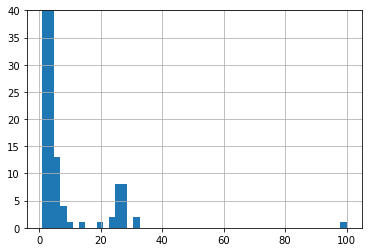

In [23]:
estate_df.ceiling_height.hist(bins=50)
plt.axis([None, None, 0, 40])

In [24]:
estate_df.ceiling_height.isna().sum()

9116

In [25]:
estate_df.ceiling_height.unique()

array([  3.,  nan,   2.,   4.,  25.,   5.,   6.,  32.,   8.,  27.,  24.,
        26.,   1.,  14.,  20.,  23.,  28.,  10., 100.])

**Промежуточный вывод:** В этой колонке много проблем - присутствуют выбросы и почти 40% пропущенных значений

Сгруппируем данные по домам с определённым кол-вом этажей (скорее всего у них одинаковые проекты) и их меданному значению высоты потолков. Как видим - в репрезентативных данных везде медианное значение высоты потолков составляет 3 метра

In [26]:
estate_df.groupby('floors_total')['ceiling_height'].agg(['count', 'median']).head(10)

,count,median
floors_total,,
1.0,10,3.0
2.0,215,3.0
3.0,399,3.0
4.0,789,3.0
5.0,3666,3.0
6.0,619,3.0
7.0,398,3.0
8.0,220,3.0
9.0,2557,3.0


Заменяем NaN и значения больше шести метров и меньше 2.7 метров медианой (т.к. квартир с такими потолками не бывает).

In [27]:
estate_df.ceiling_height.fillna(estate_df.ceiling_height.median(), inplace=True)
estate_df.ceiling_height[(estate_df.ceiling_height > 6) | (estate_df.ceiling_height < 2.7)] = estate_df.ceiling_height.median()

#### Обработаем колонку `balcony`

Там где кол-во балконов не указано - заполним значения нулями и приведём тип данных к целочисельному.

In [28]:
estate_df.balcony = estate_df.balcony.fillna(0).astype(int)

#### Обработаем колонку `locality_name`

In [29]:
estate_df[estate_df.locality_name.isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,82.0,2016-04-15,3,4.0,5.0,51.0,2,NaN,...,9.0,0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30,3,3.0,4.0,43.0,2,NaN,...,19.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,43.0,2015-09-20,1,3.0,24.0,16.0,3,NaN,...,11.0,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.0,2015-10-11,2,3.0,24.0,33.0,21,NaN,...,8.0,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.0,2016-05-28,2,3.0,5.0,31.0,5,NaN,...,6.0,0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


In [30]:
print(f'Имеется {estate_df.locality_name.isna().sum()} пропущенных значений в колонке "locality_name"')

Имеется 48 пропущенных значений в колонке "locality_name"


Данных немного. Определять, где они находятся можно но сложно - игра не стоит свеч. Удалим эти данные.

In [31]:
estate_df = estate_df[estate_df.locality_name.notna()]

#### Обработаем колонку `kitchen_area` и `living_area`

Сгруппируем данные по этажам, предполагая типовую застройку, и рассчитаем медианное отношение кухни и жилой площади к полной площади. Как видим, значения отношения бывают крайне разные.

In [32]:
area_df = estate_df.groupby('floors_total')[['total_area', 'living_area', 'kitchen_area']].agg('median')

area_df['liv_ar_rel_med'] = round(area_df['living_area'] / area_df['total_area'], 1)

area_df['kit_ar_rel_med'] = round(area_df['kitchen_area'] / area_df['total_area'], 1)

area_df

,total_area,living_area,kitchen_area,liv_ar_rel_med,kit_ar_rel_med
floors_total,,,,,
1.0,54.0,32.0,9.0,0.6,0.2
2.0,45.0,30.0,7.0,0.7,0.2
3.0,54.0,32.0,8.0,0.6,0.1
4.0,62.0,37.0,10.0,0.6,0.2
5.0,48.0,30.0,7.0,0.6,0.1
6.0,74.0,43.0,11.0,0.6,0.1
7.0,68.0,38.0,11.0,0.6,0.2
8.0,71.0,36.0,12.5,0.5,0.2
9.0,50.0,30.0,8.0,0.6,0.2


In [33]:
# функция для заполнения пропущенных значений в жилой площади
def living_fill(row):
    # присваиваем переменным значения
    living_area = row['living_area']
    total_area = row['total_area']
    floors_total = row['floors_total']
    # если жилая площадь не заполнена:
    if np.isnan(living_area):
        # рассчитываем её по согласно данным из таблицы area_df
        living_area = round(total_area * area_df.loc[floors_total, 'liv_ar_rel_med'], 1)
        return living_area
    else:
        return living_area

# функция для заполнения пропущенных значений в площади кухни
def kitchen_fill(row):
    # присваиваем переменным значения
    kitchen_area = row['kitchen_area']
    total_area = row['total_area']
    floors_total = row['floors_total']
    # если жилая площадь кухни не заполнена:
    if np.isnan(kitchen_area):
        # рассчитываем её по согласно данным из таблицы area_df
        kitchen_area = round(total_area * area_df.loc[floors_total, 'kit_ar_rel_med'], 1)
        return kitchen_area
    else:
        return kitchen_area

estate_df['living_area'] = estate_df.apply(living_fill, axis=1)
estate_df['kitchen_area'] = estate_df.apply(kitchen_fill, axis=1)

**Промежуточный вывод по заполнению пропущенных значений в `living_area` и `kitchen_area`:**

Проверим результат - сколько получилось квартир, где сумма `living_area` и `kitchen_area` больше чем `total_area`

In [34]:
len(estate_df[estate_df.living_area + estate_df.kitchen_area > estate_df.total_area])

121

Учитывая, что мы заполнили около 4 тыс. пропущенных значений данная ошибка несущественна. Особенно учитывая тот факт, что в некоторых квартирах указано, что почти всю площадь занимает `living_area`

In [35]:
estate_df[['total_area', 'living_area', 'kitchen_area']].loc[[551]]

,total_area,living_area,kitchen_area
551,32.0,31.0,9.0


#### Обработка остальных незаполненных данных

In [36]:
estate_df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20797
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15528
ponds_around3000         5500
ponds_nearest           14527
days_exposition          3170
dtype: int64

Остальных пропусков слишком много и они сложные в обработке - оставим пока всё как есть.

## Расчёты и добавление результатов в таблицу

#### Добавим цену квадратного метра в таблицу

In [37]:
estate_df['sqm_price'] = (estate_df.last_price / estate_df.total_area).astype(int)

#### Добавим день недели, месяц и год публикации объявления

Т.к. в pandas туго с сортировкой имён дней недели и месяцев, поставим их чисельные значения.

In [38]:
# Day
estate_df['day_exposition'] = estate_df['first_day_exposition'].dt.weekday

# Month
estate_df['month_exposition'] = estate_df['first_day_exposition'].dt.month

# Year
estate_df['year_exposition'] = estate_df['first_day_exposition'].dt.year

estate_df[['first_day_exposition', 'day_exposition', 'month_exposition', 'year_exposition']].head()

,first_day_exposition,day_exposition,month_exposition,year_exposition
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2015-07-24,4,7,2015
4,2018-06-19,1,6,2018


#### Этаж квартиры; варианты — первый, последний, другой;

In [39]:
estate_df['floor_categ'] = estate_df.apply(lambda x: 'first' if x.floor==1 else 'last' if x.floor==x.floors_total else 'other', axis=1)
estate_df[['floors_total', 'floor', 'floor_categ']][10:15]

,floors_total,floor,floor_categ
10,12.0,3,other
11,5.0,4,other
12,5.0,5,last
13,5.0,5,last
14,6.0,1,first


#### Соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [40]:
# Соотношение жилой и общей площади
estate_df['living_area_ratio'] = round(estate_df.living_area / estate_df.total_area, 2)

In [41]:
# отношение площади кухни к общей
estate_df['kitchen_area_ratio'] = round(estate_df.kitchen_area / estate_df.total_area, 2)

In [42]:
estate_df[['total_area', 'living_area', 'kitchen_area', 'living_area_ratio', 'kitchen_area_ratio']] .head()

,total_area,living_area,kitchen_area,living_area_ratio,kitchen_area_ratio
0,108.0,51.0,25.0,0.47,0.23
1,40.0,19.0,11.0,0.48,0.28
2,56.0,34.0,8.0,0.61,0.14
3,159.0,79.5,31.8,0.50,0.20
4,100.0,32.0,41.0,0.32,0.41


## Исследовательский анализ данных

### Изучаем следующие параметры: площадь, цена, число комнат, высота потолков.

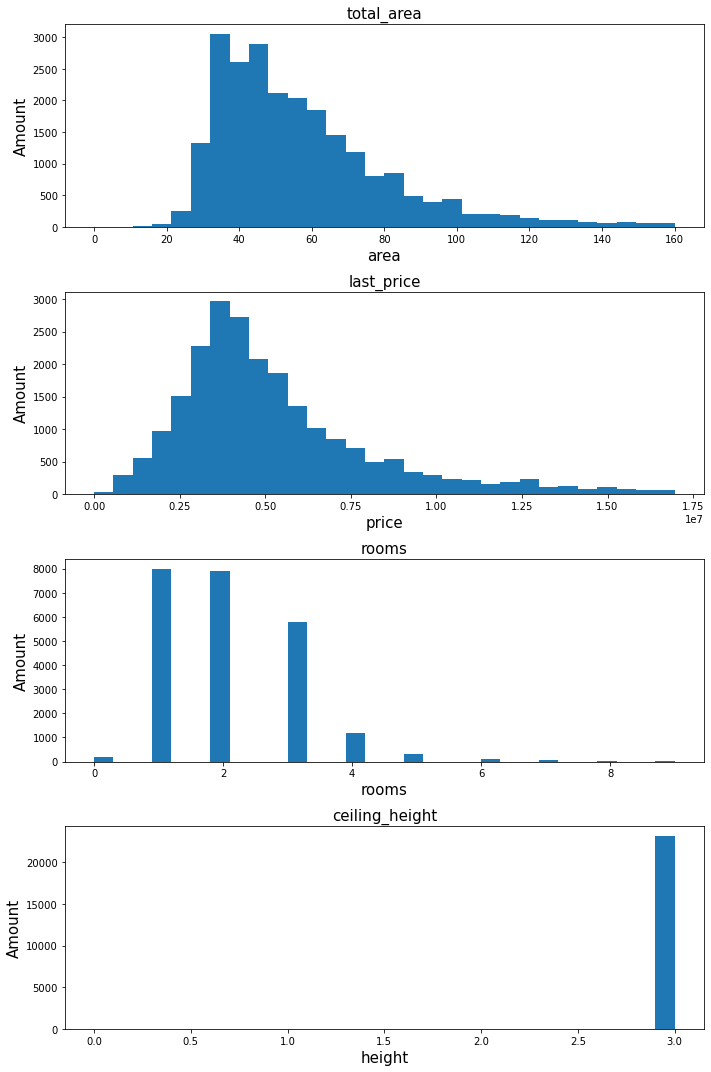

In [43]:
fig, axes = plt.subplots(4, 1, figsize=(10, 15))

columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']

for i, col in enumerate(columns):
    
    q1 = estate_df[col].quantile(0.25)
    q3 = estate_df[col].quantile(0.75)
    iqr = q3 - q1
    
    axes[i].hist(estate_df[col], bins=30, range=(0, (q3 + 3 * iqr)))
    axes[i].set_title(col, fontsize=15)
    axes[i].set_ylabel('Amount', fontsize=15)
    axes[i].set_xlabel(col.split('_')[-1], fontsize=15)

plt.tight_layout()

#### Изучим распределение высоты потолков

(2.85, 6.15, 0.0, 40.0)

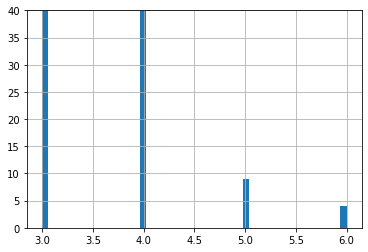

In [44]:
estate_df.ceiling_height.hist(bins=50)
plt.axis([None, None, 0, 40])

**Вывод:** 
- большинство квартир имеют площадь в промежутке 25-70 м. кв
- медианная цена квартир около 5 млн. рублей (с выбросами до сотен миллионов), распределение цен выглядит нормально.
- большинство квартир имеют от 1 до 3 комнат.
- большинство квартир имеют потолки высотой 3 метра.

### Изучаем время продажи квартиры.

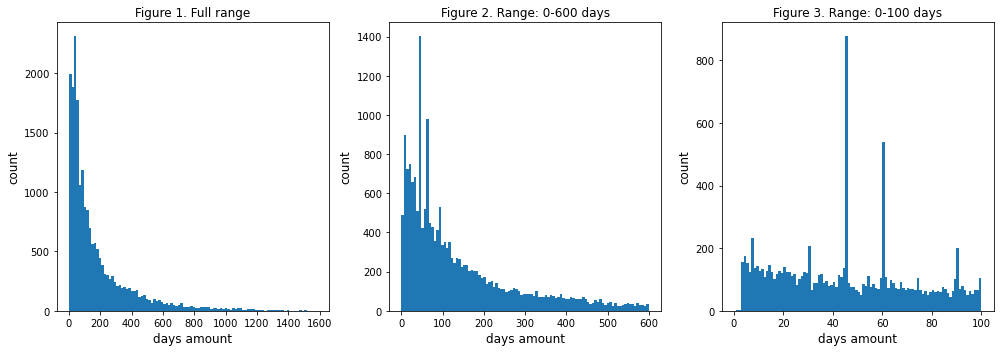

In [45]:
fig, ax = plt.subplots(1, 3, figsize=(14, 5))

ax[0].hist(estate_df.days_exposition, bins=100)
ax[1].hist(estate_df.days_exposition, bins=100, range=(0, 600))
ax[2].hist(estate_df.days_exposition, bins=100, range=(0, 100))

ax[0].set_title('Figure 1. Full range', fontsize=12)
ax[1].set_title('Figure 2. Range: 0-600 days', fontsize=12)
ax[2].set_title('Figure 3. Range: 0-100 days', fontsize=12)

ax[0].set_ylabel('count', fontsize=12)
ax[0].set_xlabel('days amount', fontsize=12)

ax[1].set_ylabel('count', fontsize=12)
ax[1].set_xlabel('days amount', fontsize=12)

ax[2].set_ylabel('count', fontsize=12)
ax[2].set_xlabel('days amount', fontsize=12)

plt.tight_layout()

plt.show()

In [46]:
print(f'Среднее время продажи: {round(estate_df.days_exposition.mean(), 2)} дней')

Среднее время продажи: 180.77 дней


In [47]:
print(f'Медианное время продажи: {estate_df.days_exposition.median()} дней')

Медианное время продажи: 95.0 дней


Поделим время продажи на 20 частей

In [48]:
pd.qcut(estate_df.days_exposition, 20, retbins=True)[-1].astype(int)

array([   1,    9,   17,   26,   34,   45,   48,   60,   67,   82,   95,
        113,  135,  160,  190,  231,  287,  363,  460,  647, 1580])

**Вывод:** Видим сильные выбросы на некоторых значениях кол-ва дней продажи. 95% квартир продаётся меньше чем за 647 дней. 10% квартир продаётся в интервале 1-17 дней.

### Убераем редкие и выбивающиеся значения.

Посмотрим на выбросы в чисельных колонках.

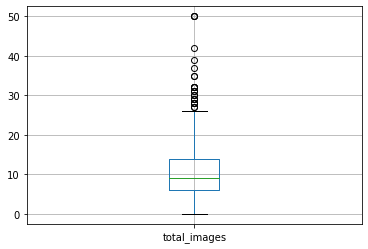

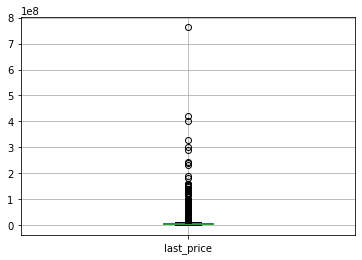

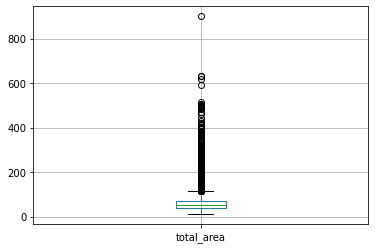

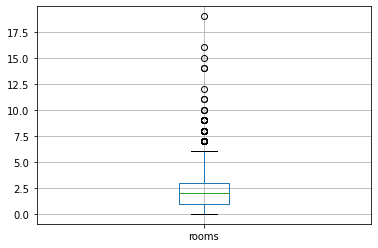

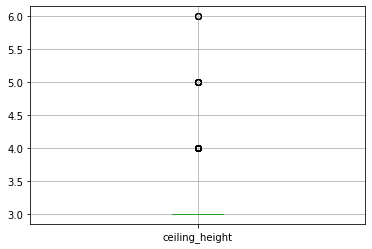

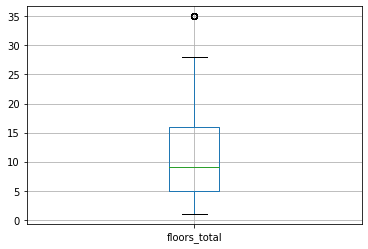

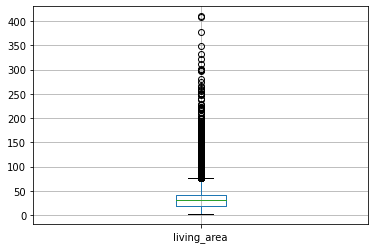

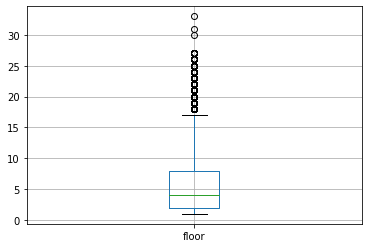

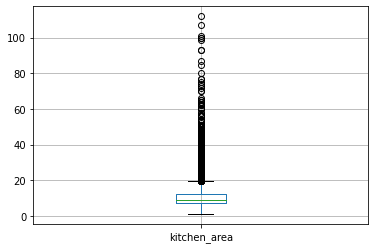

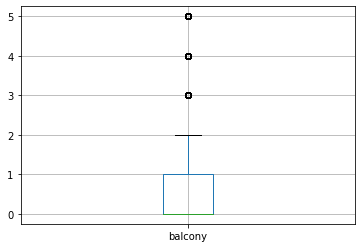

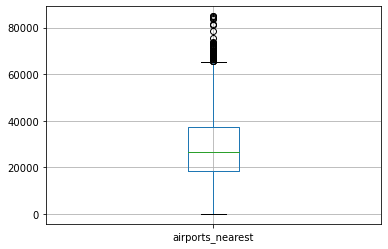

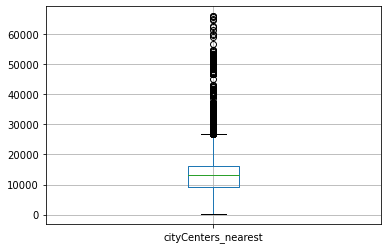

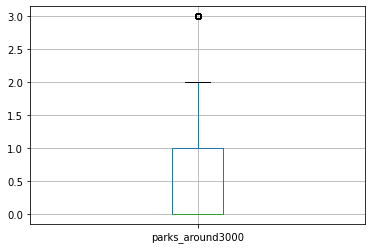

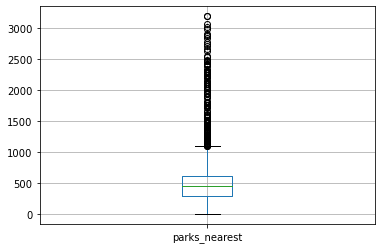

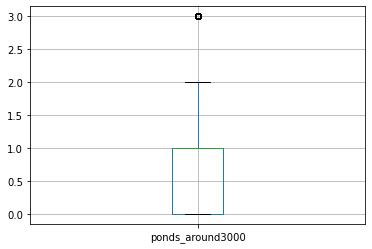

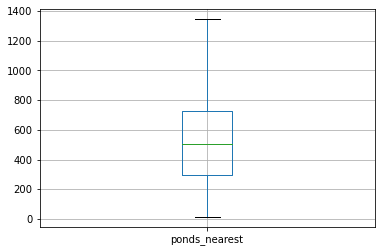

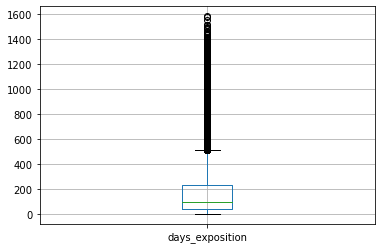

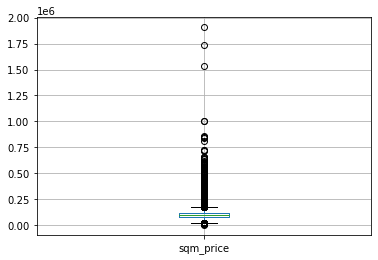

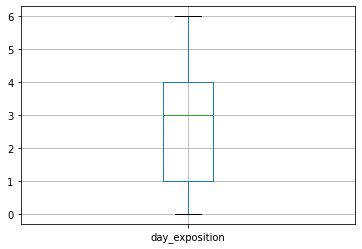

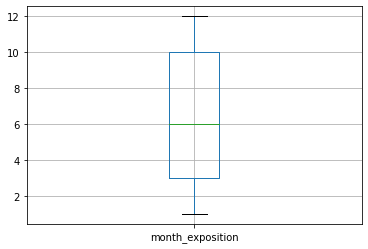

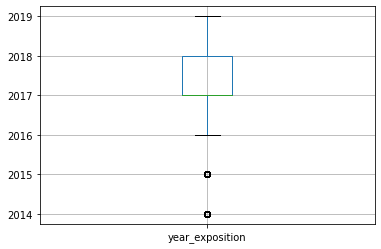

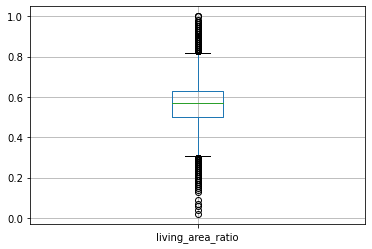

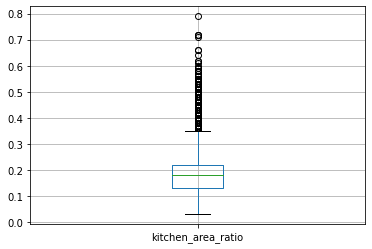

In [49]:
for column in estate_df.select_dtypes(include='number'):
    plt.figure()
    estate_df.boxplot([column])

 Проблемными являются:
- `last_price`
- `days_exposition`
- `total_area`
- `rooms` и `living_area`, но они сильно коррелируют с `total_area`
- `kitchen_area` точно навряд может быть больше 20-ти квадратов.

Все эти колонки нужно обработать

Разобъём данные колонки на 20 частей:

In [50]:
column_names = ['last_price', 'days_exposition', 'total_area', 'rooms', 'living_area', 'kitchen_area']
for column in column_names:
    print(f'Column "{column}" имеет такое распределение значений:')
    print(pd.qcut(estate_df[column], 20, retbins=True, duplicates='drop')[-1].astype(int))
    print('\n')

Column "last_price" имеет такое распределение значений:
[    12190   1857500   2500000   2890000   3180500   3400000   3650000
   3900000   4100000   4380000   4646500   4950000   5290000   5680000
   6172219   6790000   7570000   8800000  10900000  15300000 763000000]


Column "days_exposition" имеет такое распределение значений:
[   1    9   17   26   34   45   48   60   67   82   95  113  135  160
  190  231  287  363  460  647 1580]


Column "total_area" имеет такое распределение значений:
[ 12  31  33  35  38  40  42  44  46  49  52  55  58  61  65  70  75  82
  93 116 900]


Column "rooms" имеет такое распределение значений:
[ 0  1  2  3  4 19]


Column "living_area" имеет такое распределение значений:
[  2  15  16  17  18  19  20  25  27  29  30  31  33  36  39  42  45  49
  55  69 410]


Column "kitchen_area" имеет такое распределение значений:
[  1   5   6   7   7   8   9  10  10  11  12  13  14  16  20 112]




**Данные, которые пойдут в датафрейм `good_estate_df`:**

- 95% квартир имеют площадь до 116 м. кв. Так же только 5% квартир имеют площадь менее 31 м. кв. Остальные данные исключим. 
- 95% квартир стоят до ~15 млн. р. Но так же есть варианты, цена которых составляет от 12 тыс. рублей, что не может быть правдой. Остальные данные исключим.
- 95% квартир продаются за 647 дней. Остальные данные исключим.
- 95% квартир имеют до 4-ех комнат. Остальные данные исключим.
- 95% квартир имеют жилую площадь до 69 м. кв. Остальные данные исключим.
- 95% квартир имеют площадь кухни до 20 м. кв. Остальные данные исключим.
- часть квартир имеет 0 комнат, не будет включать эти значения тоже.

In [51]:
good_estate_df = estate_df[(estate_df.total_area >= 31) & (estate_df.total_area <= 116)
                           & (estate_df.days_exposition <= 647) & (estate_df.last_price <=15300000)
                           & (estate_df.last_price >= 1000000) & (estate_df.kitchen_area <= 20)
                           & (estate_df.living_area <= 69) & (estate_df.rooms <= 4) & (estate_df.rooms >= 1)]

In [52]:
print(f'У нас осталось {round(good_estate_df.shape[0]/estate_df.shape[0]*100, 1)}% от изначальной таблицы. Зато данные теперь репрезентативные')

У нас осталось 71.3% от изначальной таблицы. Зато данные теперь репрезентативные


In [53]:
good_estate_df.days_exposition.value_counts().sort_values(ascending=False).to_frame().head()

,days_exposition
45.0,777
60.0,509
7.0,211
30.0,181
4.0,153


**Особенности:** в определённые дни (45, 60) кол-во продаж сильно больше, чем в остальные.

### Изучаем, какие факторы больше всего влияют на стоимость квартиры.

Визуализируем корреляцию цены с остальными колонками

<AxesSubplot:>

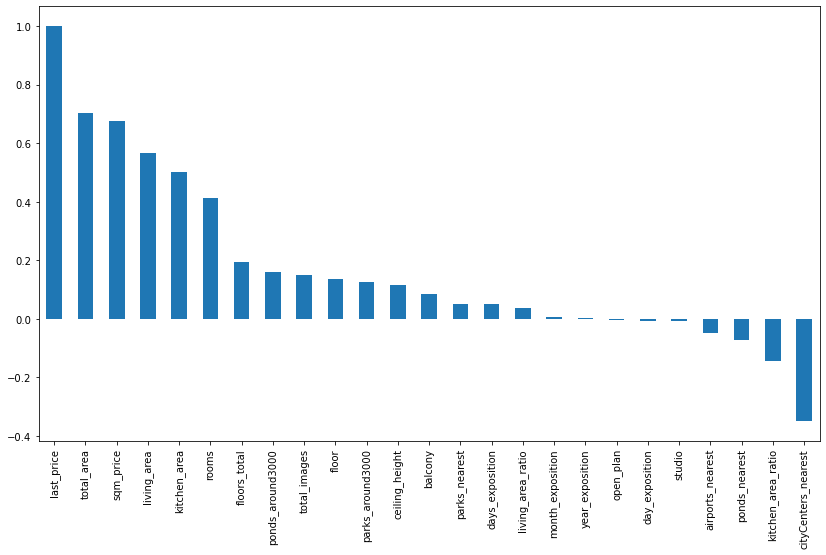

In [54]:
good_estate_df.corr()['last_price'].sort_values(ascending=False).plot(kind='bar',figsize=(14,8))

**Промежуточный вывод:** цена квартиры коррелирует со значениями, которые относятся к площади квартиры, средне коррелирует с числом комнат и имеет среднюю обратную корреляцию с удалённостью от центра (т.е. чем меньше расстояние к центру - тем выше цена).

Для `last_price`: Построим матрицу диаграм рассеяния к колонкам, указанным в задании.

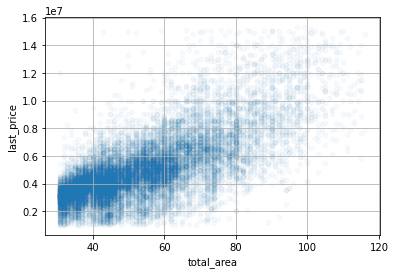

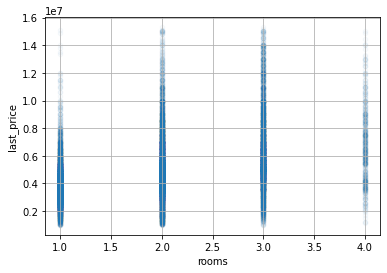

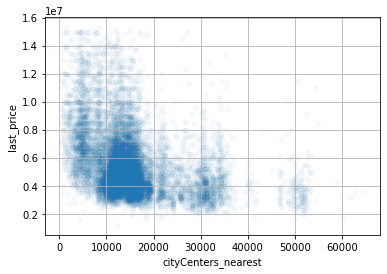

In [55]:
column_names = ['total_area', 'rooms', 'cityCenters_nearest']

for column in column_names:
    good_estate_df.plot(x = column, y = 'last_price', kind='scatter', grid=True, alpha=0.03)

Для `sqm_price`: Построим матрицу диаграм рассеяния к колонкам, указанным в задании.

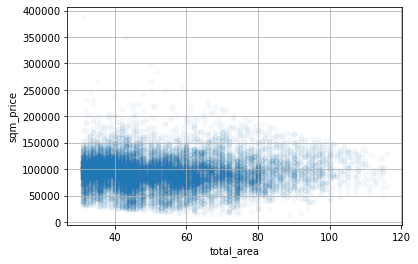

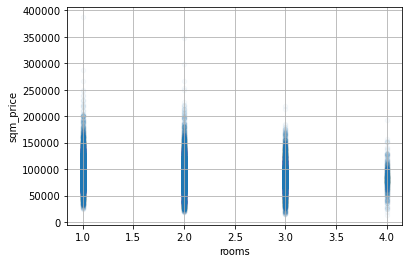

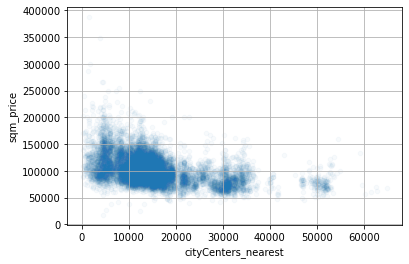

In [56]:
column_names = ['total_area', 'rooms', 'cityCenters_nearest']

for column in column_names:
    good_estate_df.plot(x = column, y = 'sqm_price', kind='scatter', grid=True, alpha=0.03)

**Промежуточный вывод:** 
- цена квартиры имеет близкую к линейною корреляцию с площадью квартиры.
- цена квадратного метра самая высока в одно- и двух-комнатных квартирах. В трёх-комнатных уже ниже. Самые дешёвые - четырёхкомнатные. Причём с общей площадью квартиры цена квадратного метра не коррелирует.
- Так же, цена квадратного метра выше всего ближе к центру города.
- цена квартиры коррелирует с кол-вом комнат (2-х и 3-х комнатные квартиры стоят больше одно и четырёхкомнатных).
- так же видно, что чем меньше расстояние к центру - тем выше цена квартиры.


### Изучаем зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

In [57]:
good_estate_df.groupby('floor_categ')['last_price'].agg(['count', 'median'])

,count,median
floor_categ,,
first,2022,3850000.0
last,2216,4150000.0
other,12552,4599000.0


**Промежуточный вывод:** данный график нам показывает, что квартиры на первом и последних этажах в основном дешевле чем квартиры на остальных этажах (квартиры на первых этажах самые дешевые).

### Изучаем зависимость от даты размещения: дня недели, месяца и года.

**Зависимость от дня недели**

In [58]:
good_estate_df.groupby('day_exposition')['last_price'].agg(['count', 'median'])

,count,median
day_exposition,,
0,2510,4450000.0
1,2925,4490000.0
2,2786,4480000.0
3,3064,4499000.0
4,2933,4360000.0
5,1368,4500000.0
6,1204,4350000.0


<AxesSubplot:xlabel='day_exposition'>

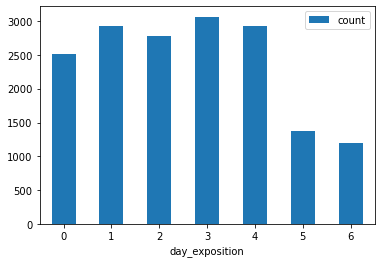

In [59]:
good_estate_df.groupby('day_exposition')['last_price'].agg(['count', 'median']).plot(y='count', kind='bar', rot=0)

**Промежуточный вывод:** данные нам показывают, что квартир, выставленных на продажу в выходные дни, в среднем в 2 раза меньше чем квартир, выставленных в рабочие дни. Из рабочих дней, понедельник - самый малочисленный. При этом, медианная цена на квартиру не зависит от того, в какой день она была выставлена.

**Зависимость от месяца**

In [60]:
good_estate_df.groupby('month_exposition')['last_price'].agg(['count', 'median']).sort_values('count')

,count,median
month_exposition,,
5,917,4400000.0
1,1059,4450000.0
12,1174,4450000.0
4,1242,4500000.0
7,1286,4400000.0
8,1359,4500000.0
6,1371,4300000.0
9,1489,4500000.0
3,1577,4400000.0


<AxesSubplot:xlabel='month_exposition'>

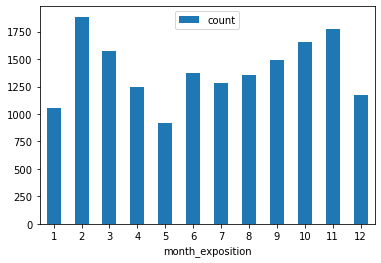

In [61]:
good_estate_df.groupby('month_exposition')['last_price'].agg(['count', 'median']).plot(y='count', kind='bar', rot=0)

**Промежуточный вывод:** данные нам показывают, что меньше всего выставляют квартир на продажу в мае, январе и декабре. Больше всего - в феврале и ноябре. При этом, медианная цена на квартиру не зависит от того, в какой месяц она была выставлена.

**Зависимость от года**

In [62]:
good_estate_df.groupby('year_exposition')['last_price'].agg(['count', 'median'])

,count,median
year_exposition,,
2014,23,7265000.0
2015,517,4700000.0
2016,1968,4300000.0
2017,6733,4360000.0
2018,6608,4490000.0
2019,941,4800000.0


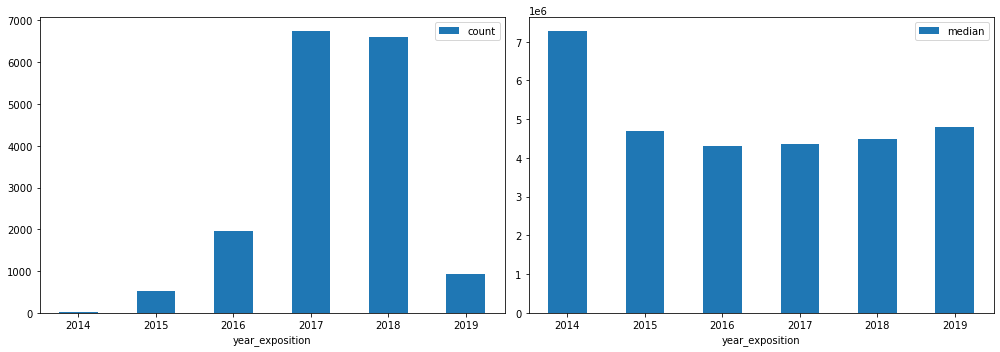

In [63]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 5))

good_estate_df.groupby('year_exposition')['last_price'].agg(['count', 'median']).plot(y='count', kind='bar', rot=0, ax=axes[0])
good_estate_df.groupby('year_exposition')['last_price'].agg(['count', 'median']).plot(y='median', kind='bar', rot=0, ax=axes[1])

plt.tight_layout()

**Промежуточный вывод:** данные нам показывают, что меньше всего данных за 2014 год, а потом кол-во постепенно возрастает и падает в 2019-ом. Скорее всего сервис запустился в 2014-ом, а этот датафрейм выгрузили в начале 2019-го. Из-за малой выборки за 2014-ый медианная цена очень высокая - данные не репрезентативны. Минимум медианных цен достигнут в 2016-2017 годах, начиная с 2018-го начинается небольшой рост цен (хотя данных за 2019-ый в 7 раз меньше чем за предыдущие 2 года и это может быть не точно).

### Выбераем 10 населённых пунктов с наибольшим числом объявлений. Считаем среднюю цену квадратного метра в этих населённых пунктах. 

In [64]:
good_estate_df.groupby('locality_name')['sqm_price'].agg(['count', 'mean']).sort_values('count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,10994,105378.136256
посёлок Мурино,420,84541.947619
посёлок Шушары,368,76752.214674
Всеволожск,304,66651.776316
Колпино,284,74243.454225
посёлок Парголово,277,89427.657040
Пушкин,246,99289.207317
Гатчина,236,68057.008475
деревня Кудрово,234,92351.777778


### Выделяем населённые пункты с самой высокой и низкой стоимостью жилья.

Для репрезентативности возьмём населённые пункты с кол-вом объявлений больше 20-ти

In [65]:
result = good_estate_df.groupby('locality_name')['sqm_price'].agg(['count', 'mean', 'median']).sort_values('mean', ascending=False)
result = result[result['count'] >= 20]
result.head()

,count,mean,median
locality_name,,,
Санкт-Петербург,10994,105378.136256,101383.5
Сестрорецк,137,101035.532847,98387.0
Пушкин,246,99289.207317,96824.5
Кудрово,125,97155.776000,97575.0
деревня Кудрово,234,92351.777778,91428.0


Населённый пункт с самой высокой медианной стоимостью жилья:

In [66]:
result['median'].idxmax()

'Санкт-Петербург'

Населённый пункт с самой низкой медианной стоимостью жилья:

In [67]:
result['median'].idxmin()

'Сланцы'

Населённый пункт с самой высокой средней стоимостью жилья:

In [68]:
result['mean'].idxmax()

'Санкт-Петербург'

Населённый пункт с самой низкой средней стоимостью жилья: 

In [69]:
result['mean'].idxmin()

'Сланцы'

Построим график топ-10 медианной цены по населённым пунктам

<AxesSubplot:xlabel='locality_name'>

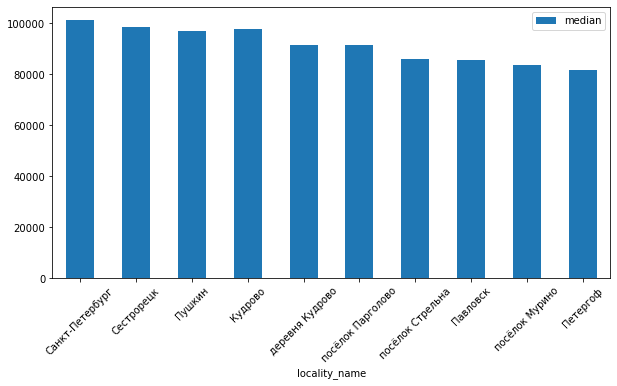

In [70]:
result.reset_index().head(10).plot(x='locality_name', y='median', kind='bar', figsize=(10, 5), rot=45)

### Изучаем предложения квартир. Выясняем, какая область входит в центр.

In [71]:
# Cоздаём отдельный датафрейм
spb_df = good_estate_df[good_estate_df.locality_name == 'Санкт-Петербург']

# Создаём в нём колонку с целыми километрами
spb_df['cityCenters_nearest_km'] = round(spb_df['cityCenters_nearest']/1000, 0)
spb_df[['cityCenters_nearest', 'cityCenters_nearest_km']].head()

,cityCenters_nearest,cityCenters_nearest_km
2,13933.0,14.0
9,15008.0,15.0
10,13878.0,14.0
15,14259.0,14.0
16,10698.0,11.0


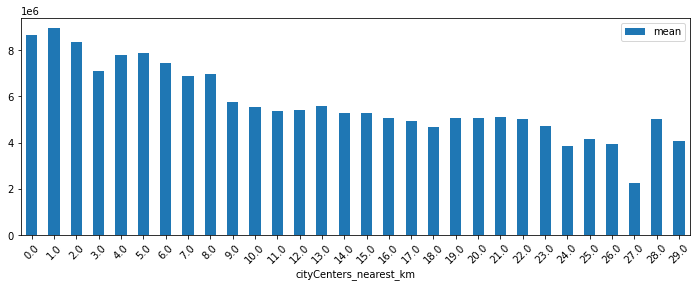

In [72]:
# Считаем среднюю цену для каждого километра
spb_df.groupby('cityCenters_nearest_km')['last_price'].agg(['count', 'mean']).plot(y='mean', kind='bar', figsize=(12,4), rot=45)
plt.show()

**Промежуточный вывод:** График меняется в 2 км от центра - это и есть центральная зона.

### Выделяем сегмент квартир в центре. Анализируем эту территорию и изучаем следующие параметры: площадь, цена, число комнат, высота потолков.

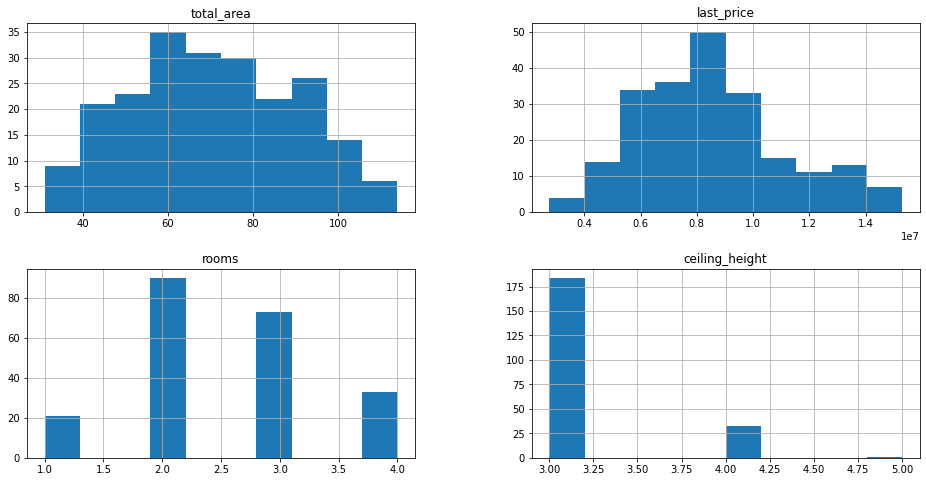

In [73]:
# создаём таблицу, относящуюся только к центральным квартирам в Питере
spb_df_center = spb_df[spb_df.cityCenters_nearest_km <= 2]

# создаём таблицу, относящуюся ко всем квартирам в Питере кроме центра
spb_df_not_center = spb_df[spb_df.cityCenters_nearest_km > 2]

# создаём гистограммы по выделенным параметрам
spb_df_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].hist(figsize=(16, 8))

plt.show()

**Промежуточный вывод:** Гистограммы показывают, что самая распространённая площадь квартир в центре 40-110 м. кв., цена в основном составляют 6-10 млн. рублей. Квартиры при этом в основном 2-4 комнатные. Основная высота потолков - 3 м. Большинство квартир в центре не имеют балконов.

###  Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

**Корреляция цены с другими параметрами**

In [74]:
spb_df_center[['last_price', 'rooms', 'floor', 'cityCenters_nearest',
               'first_day_exposition', 'ceiling_height', 'total_area', 'balcony']].corr().head(1)

,last_price,rooms,floor,cityCenters_nearest,ceiling_height,total_area,balcony
last_price,1.0,0.286741,0.083209,-0.122704,0.188941,0.532301,0.039837


<AxesSubplot:>

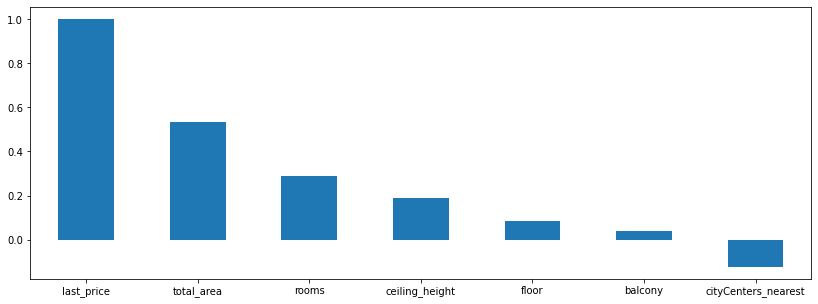

In [75]:
spb_df_center[['last_price', 'rooms', 'floor', 'cityCenters_nearest',
               'first_day_exposition', 'ceiling_height', 'total_area', 'balcony']].corr()['last_price'].sort_values(ascending=False).plot(kind='bar',figsize=(14,5), rot=0)

Изучим как определённые параметры квартиры влияют на стоимость `квадратного метра` **в центре города**

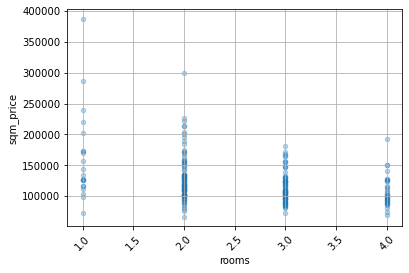

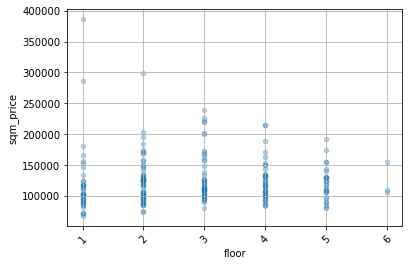

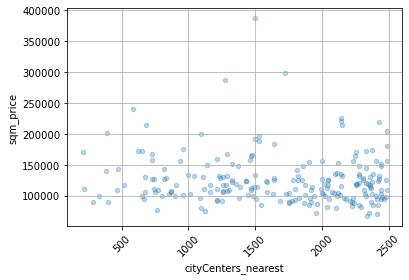

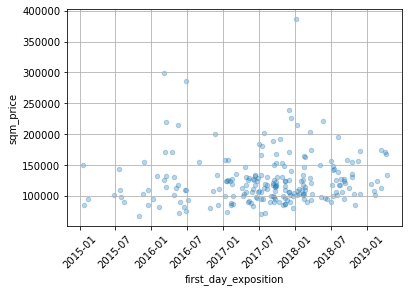

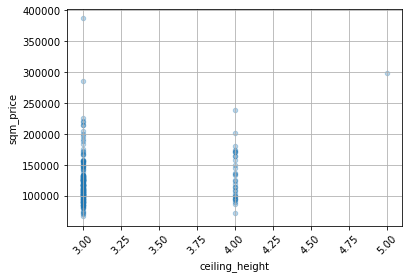

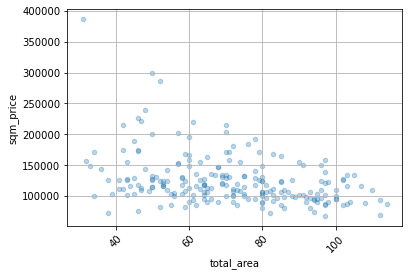

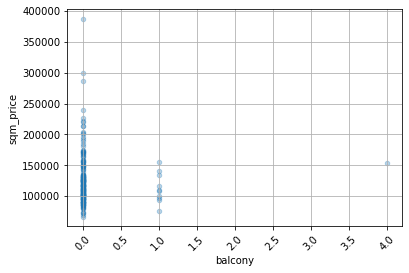

In [76]:
column_names = ['rooms', 'floor', 'cityCenters_nearest',
               'first_day_exposition', 'ceiling_height', 'total_area', 'balcony']

for column in column_names:
    spb_df_center.plot(x = column, y = 'sqm_price', kind='scatter', grid=True, alpha=0.3, rot=45)

Изучим как определённые параметры квартиры влияют на стоимость `квадратного метра` **НЕ в центре города**

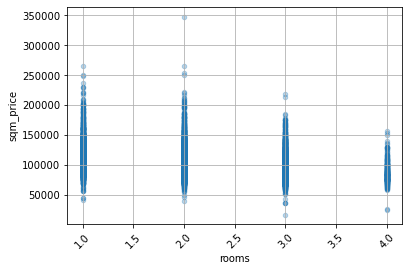

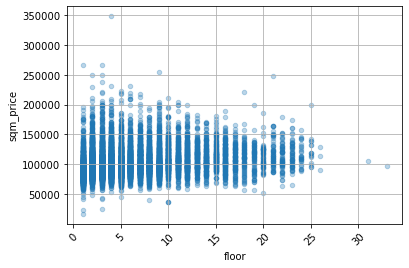

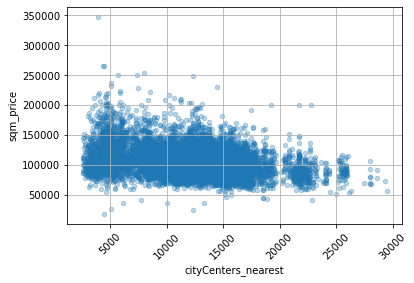

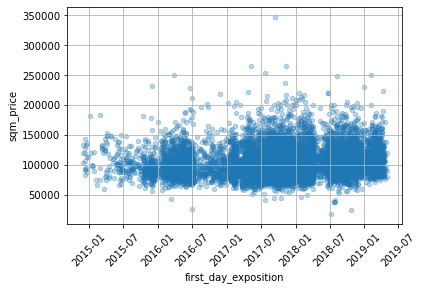

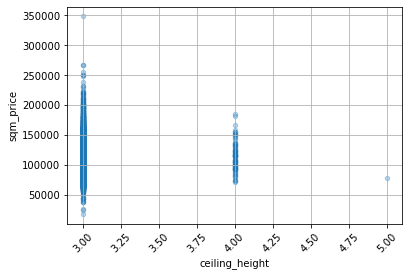

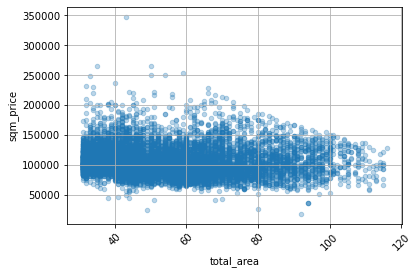

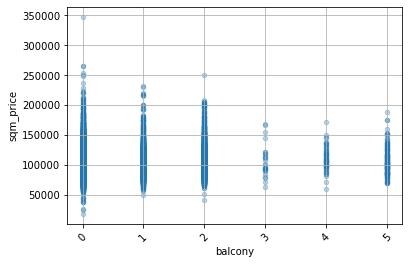

In [77]:
column_names = ['rooms', 'floor', 'cityCenters_nearest',
               'first_day_exposition', 'ceiling_height', 'total_area', 'balcony']

for column in column_names:
    spb_df_not_center.plot(x = column, y = 'sqm_price', kind='scatter', grid=True, alpha=0.3, rot=45)

**Промежуточный вывод по квартирам в центре**

Построенные графики показывают нам что:
-  цена квадратного метра сильно зависит от кол-ва комнат в квартира. Чем меньше комнат, тем больше цена квадратного метра.
- так же на первых двух этажах бывают выбросы по цене, наверняка связанные с тем, что данные квартиры будут использоваться для бизнеса. Но в среднем, самая высокая цена за квадратный метр у квартир на третьем этаже.
- цена квадратного метра в центре города почти не зависит от удалённости от центра (на краю центра в квартиры немного более дешевые).
- квартиры с потолками в 3 м в цене немного выше квартир с потолками в 4 м (возможно потому, что они новее).
- цена квадратного метра падает с возрастанием общей площади квартиры (что логично).
- и, что интересно, квартиры без балконов дороже квартир с балконами.
- наблюдается небольшое увеличение цены на квадратный метр со временем

**Промежуточный вывод по квартирам НЕ в центре**

Построенные графики показывают нам что:
-  самая дорогая цена квартир в одно- и двухкомнатных квартирах. Самая дешевая - в четырёхкомнатных.
- цена квадратного метра НЕ в центре города, на окраине, почти на треть дешевле чем возле центра.
- цена квадратного метра падает с возрастанием общей площади квартиры (что логично).
- наблюдается небольшое увеличение цены на квадратный метр со временем

**Гистограммы распределения других важных параметров**

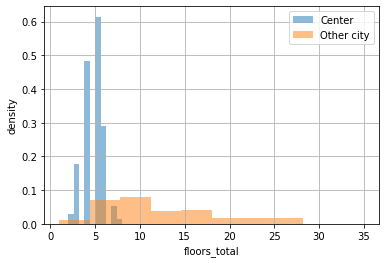

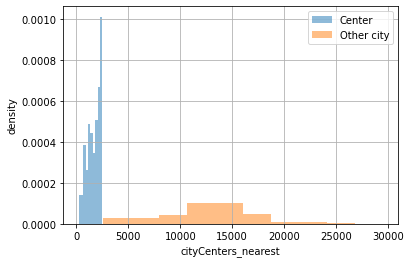

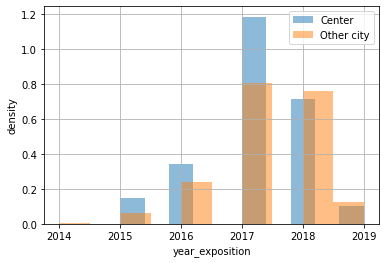

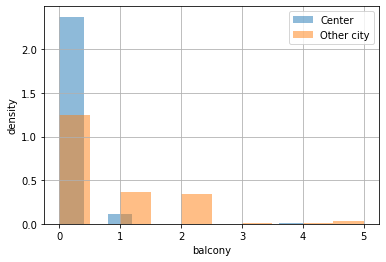

In [78]:
names = [ 'floors_total', 'cityCenters_nearest',
               'year_exposition', 'balcony']

for column in names:
    spb_df_center[column].hist(alpha=0.5, density=True,  label='Center')
    spb_df_not_center[column].hist(alpha=0.5, density=True,  label='Other city')
    plt.xlabel(column)
    plt.ylabel('density')
    plt.legend()
    plt.show()

**Промежуточный вывод:** Диаграммы показывают, что в центре в основном малоэтажная застройка (2-8 этажей), тогда как в остальном городе преобладает многоэтажная застройка (в основном до 5-17 этажей). Цена за квадратный метр почти не коррелирует с общей площадью, и слабо коррелирует с расстоянием от центра в двух случаях (центр и не центр). В отличии от квартир в остальных местах, большинство объявлений о продаже квартир в центре Питера были поданы в 2017-ом году, в то время как в 2016-ом и 2019-ом намного меньше. Интересно, что произошло в Питере в 2017-ом году?
Так же в центре в среднем в 2 раза больше площадь квартиры, чем по всей таблице.

**Годовое изменение средней цены за квадратный метр по всей таблице**

In [79]:
price_change = good_estate_df.groupby('year_exposition')[['sqm_price']].mean()
price_change.sqm_price = price_change.sqm_price.astype(int)
price_change['yearly_change'] = round(price_change['sqm_price'].pct_change()*100, 1)
price_change

,sqm_price,yearly_change
year_exposition,,
2014,95102,NaN
2015,90431,-4.9
2016,91132,0.8
2017,91494,0.4
2018,93882,2.6
2019,102717,9.4


## Общий вывод

Полученные данные содержали много пропусков - часть из них были удалены, но большинство были заполнены. Так же были добавлены дополнительные параметры: цена квадратного метра, данные по времени подачи объявления, и т.д. Показаны основные распределения параметров жилья и их влияние на стоимость. Из основной таблицы были выделены несколько суб-таблиц относящихся к определённым географическим параментрам (центр города, окраины, пригород). Из данных видно, что датасет охватывает период 2014-2019 года. По данным видно, что медианная цена на квартиру в Питербурге и окресностях составляет около 4.5 млн рублей, в то время как в самом Питере около 5.1 млн. Окрестности в основном представлены многоэтажной застройкой с балконами, а центр - малоэтажной без балконов. Средняя цена квадратного метра в центре города составляет ~125к рублей, тогда как на окраине около 80к рублей. Медианная площадь квартиры в центре города на 20 м. кв. больше чем по всему датасету (70 против 50). Начиная с 2016-го года, средняя цена за квадратный метр медленно, но уверенно повышается.